## Life expectancy prediction

- Importing necessary libraries and loading dataset

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv(r"C:\Users\Shubham Dandak\Downloads\Life Expectancy Data.csv")

In [63]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Understanding data

In [64]:
data.shape

(2938, 22)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

###### Inferences from data information
1. In our dataset we have the various dtypes including int64, float64, and object,
2. We have 22 columns and 2938 rows in our dataset,
3. By looking at dataset info we find that there are some missing values too in our dataset,
4. Life expectancy is our dependent column which depends on other independent variables

In [66]:
# Let us look at data to find is there any duplicate value is there or not
data.duplicated().sum()

0

We are not having any duplicate value in our dataset.

In [67]:
#Fix columns names formatting errors
columns_name_fixed = []

for column in data.columns:
    if column == ' thinness  1-19 years':
        column = 'Thinness 10-19 years'
    else:
        column = column.strip(' ').replace("  ", " ")
        column = column[:1].upper() + column[1:]
        
    columns_name_fixed.append(column)

data.columns = columns_name_fixed

###### Segregating data based on status of the country whether developed or developing

In [68]:
data_developed = data.loc[data['Status']=='Developed'].copy()
data_developing = data.loc[data['Status']=='Developing'].copy()

Text(0.5, 1.0, 'Life expectancy based on status')

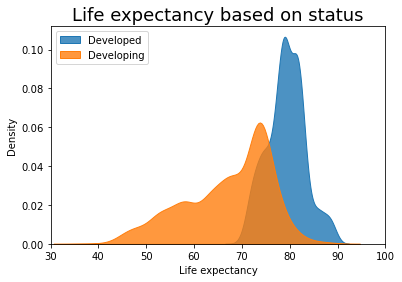

In [69]:
#Visualizing life expectancy based on status
sns.kdeplot(data_developed['Life expectancy'],label='Developed',fill=True,alpha=0.8)
sns.kdeplot(data_developing['Life expectancy'],label='Developing',fill=True, alpha=0.8)
plt.legend(loc = 'upper left')
plt.xlabel('Life expectancy',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.xlim(30,100)
plt.title('Life expectancy based on status',fontsize=18)

By observing the graph we can see:
- Devloping countries are having lesser life expectancy varying from 40 years till 85 years with maximum density between 70-80 years
- Developed countries are having higher life expectancy comparatively ranging from 70 years till 90 years.

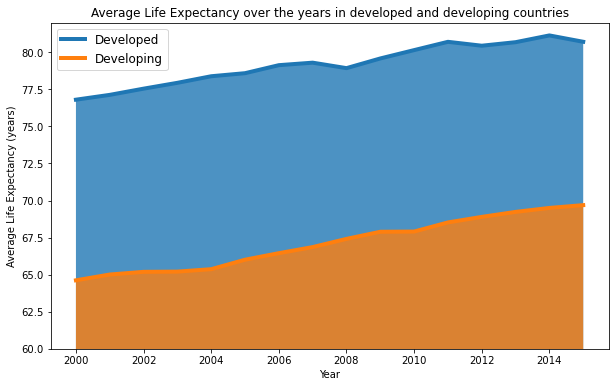

In [70]:
#Plot average life expectancy over the years
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data_developed.groupby('Year')['Life expectancy'].mean(),
       label='Developed',
       linewidth=4)

# Fill area between the line plot and the x-axis
ax.fill_between(data_developed.groupby('Year')['Life expectancy'].mean().index,
                data_developed.groupby('Year')['Life expectancy'].mean().values,
                alpha=0.8) 

ax.plot(data_developing.groupby('Year')['Life expectancy'].mean(),
       label='Developing',
       linewidth=4,)

ax.fill_between(data_developing.groupby('Year')['Life expectancy'].mean().index,
                data_developing.groupby('Year')['Life expectancy'].mean().values,
                alpha=0.8) 

plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy (years)')

# Set y-axis limits
ax.set_ylim(60,82)

ax.set_title('Average Life Expectancy over the years in developed and developing countries');

#### Plotting heatmap

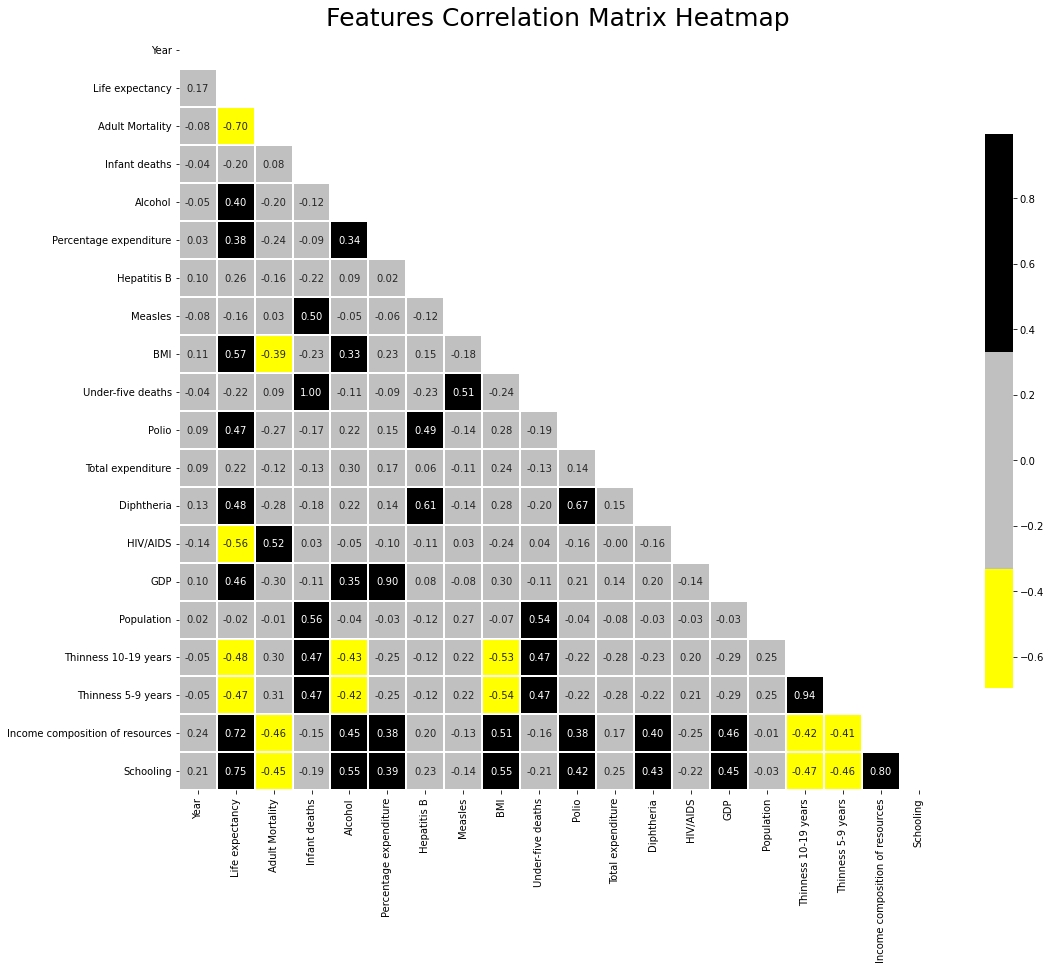

In [71]:
#Plot Matrix of Correlation
plt.figure(figsize=(17,17))

heatmap_colors = ['yellow', 'silver', 'black']

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data.corr(), 
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=25);

#### Inferences from heatmap
- Life expectancy has highly positive correlation with features like schooling, income composition of resources & BMI
- Life Expectancy have negative correlation with features like Thinness(5-9 & 10-19), HIV, and adult mortality


Let us now calculate the other than linear relationship among the variables

In [72]:
import math

In [73]:
#Function to plot scatter plots
def plot_scatterplot(df, features, title = 'Features', columns = 2, x_lim=None):
    
    df = df.copy()
    
    rows = math.ceil(len(features)/2)

    fig, ax = plt.subplots(rows, columns, sharey = True, figsize = (14,14))
    
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i+1)
        sns.scatterplot(data = data,
                        x = feature,
                        y = 'Life expectancy',
                        hue = 'Status',
                        palette=['red', 'black'],
                        ax = ax)
        if (i == 0):
            ax.legend()
        else:
            ax.legend("")
        
    fig.legend(*ax.get_legend_handles_labels(), 
               loc='lower center', 
               bbox_to_anchor=(1.04, 0.5),
               fontsize='small')
    fig.suptitle('{} x Life Expectancy'.format(title), 
                 fontsize = 25, 
                 x = 0.56);

    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

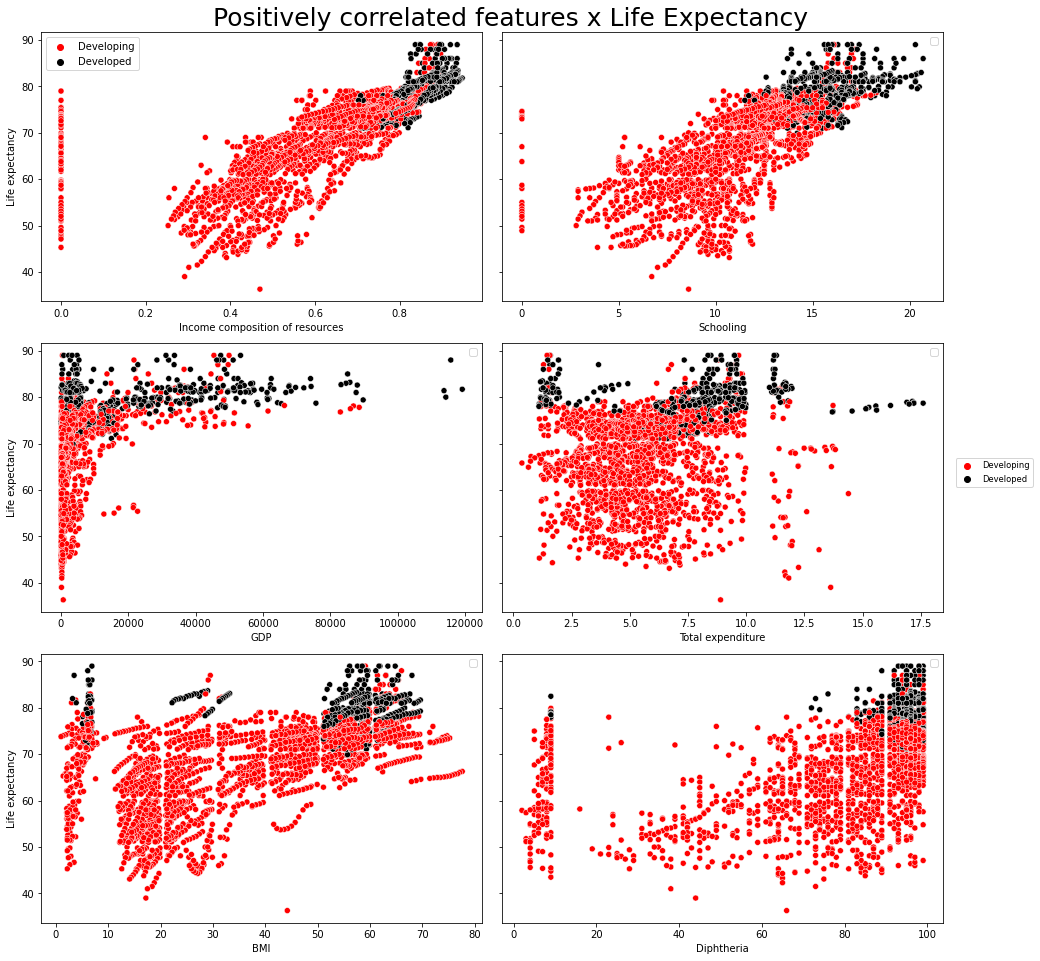

In [74]:
#Plot Life Expectancy x positively correlated features
pos_correlated_features = ['Income composition of resources', 'Schooling', 
                           'GDP', 'Total expenditure', 
                           'BMI', 'Diphtheria']

title = 'Positively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

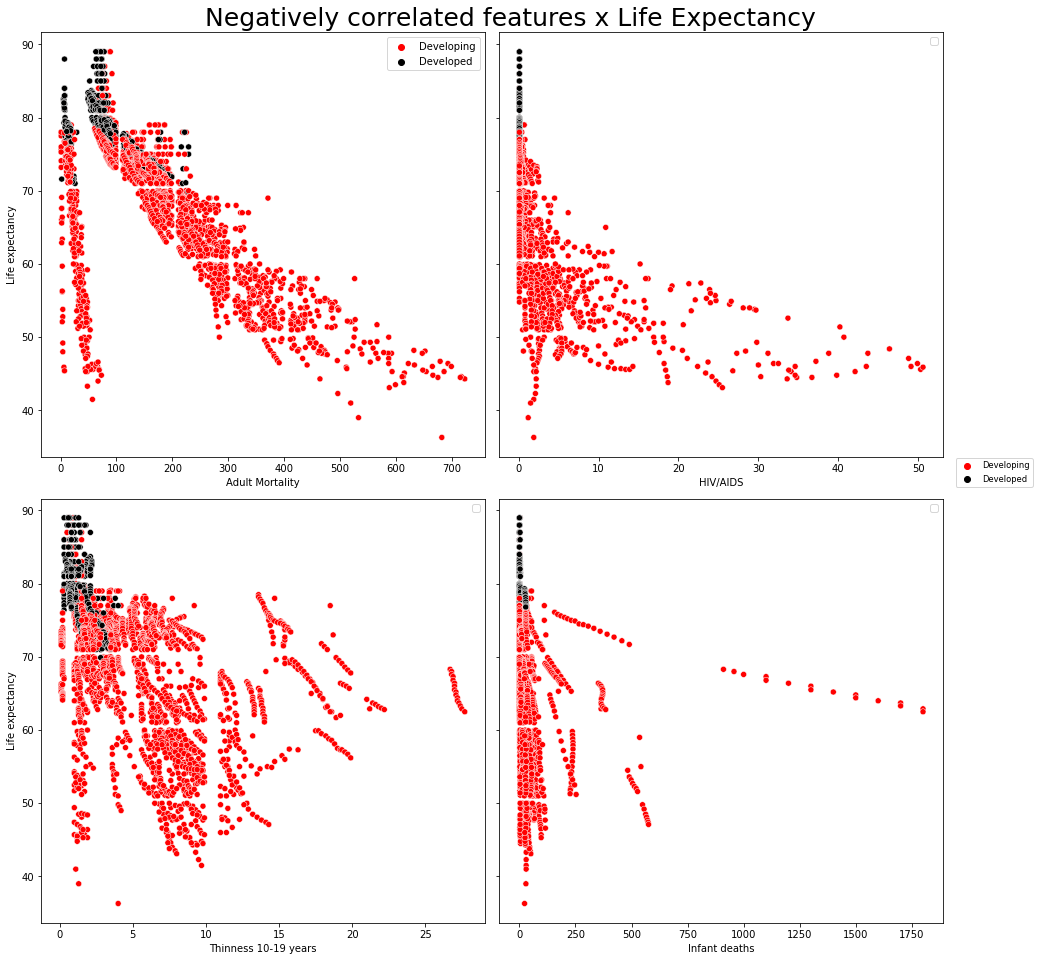

In [75]:
#Plot Life Expectancy x negatively correlated features
neg_correlated_features = ['Adult Mortality', 'HIV/AIDS', 
                           'Thinness 10-19 years', 'Infant deaths']

title = 'Negatively correlated features'

plot_scatterplot(data, neg_correlated_features, title)

In [76]:
 #Function to plot distribution 
def plot_distribution(df, columns, title="Distribution of Features"):
    
    df = df.copy()
    
    rows = math.ceil(len(columns)/2)
    
    fig, ax = plt.subplots(rows, 2, figsize = (14,14))
    
    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)

        sns.kdeplot(data.loc[data['Status']=='Developed', column], 
                    label='Developed',
                    fill=True, 
                    color = 'red',
                    alpha = 0.8, 
                    ax = ax)

        sns.kdeplot(data.loc[data['Status']=='Developing',column], 
                    label = 'Developing',
                    fill = True,
                    color = 'black',
                    alpha = 0.8,
                    ax = ax)
    
        ax.set_xlabel(column)
        ax.set_ylabel('')
    
    fig.legend(labels=['Developed', 'Developing'], 
               loc='center right', 
               bbox_to_anchor=(1.145, 0.5))
    
    fig.suptitle(title, 
                 fontsize=24,
                 x = 0.56);
    
    fig.text(0.04, 0.5, 
             'Density', 
             va='center', 
             rotation='vertical', 
             fontsize=16)
    
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

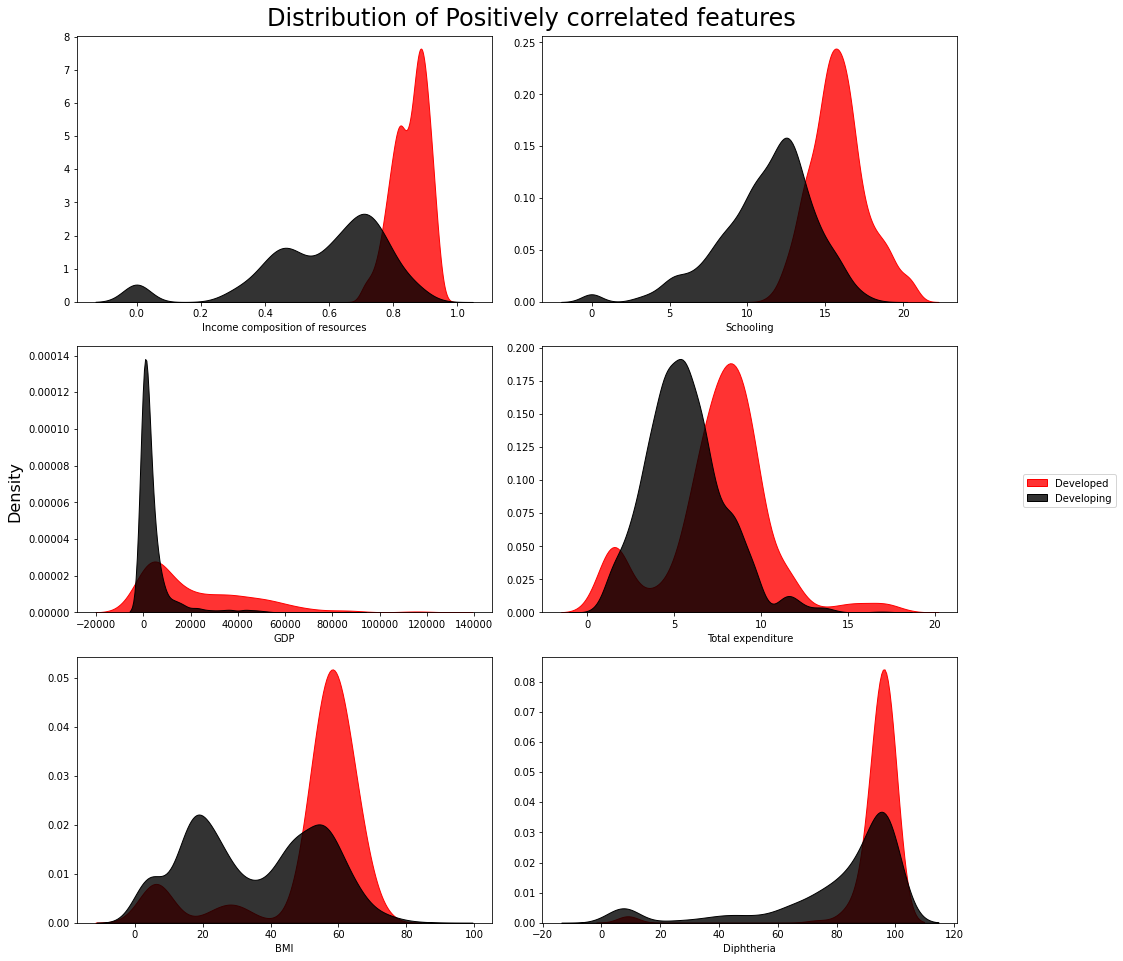

In [77]:
title = 'Distribution of Positively correlated features'
plot_distribution(data, pos_correlated_features, title)

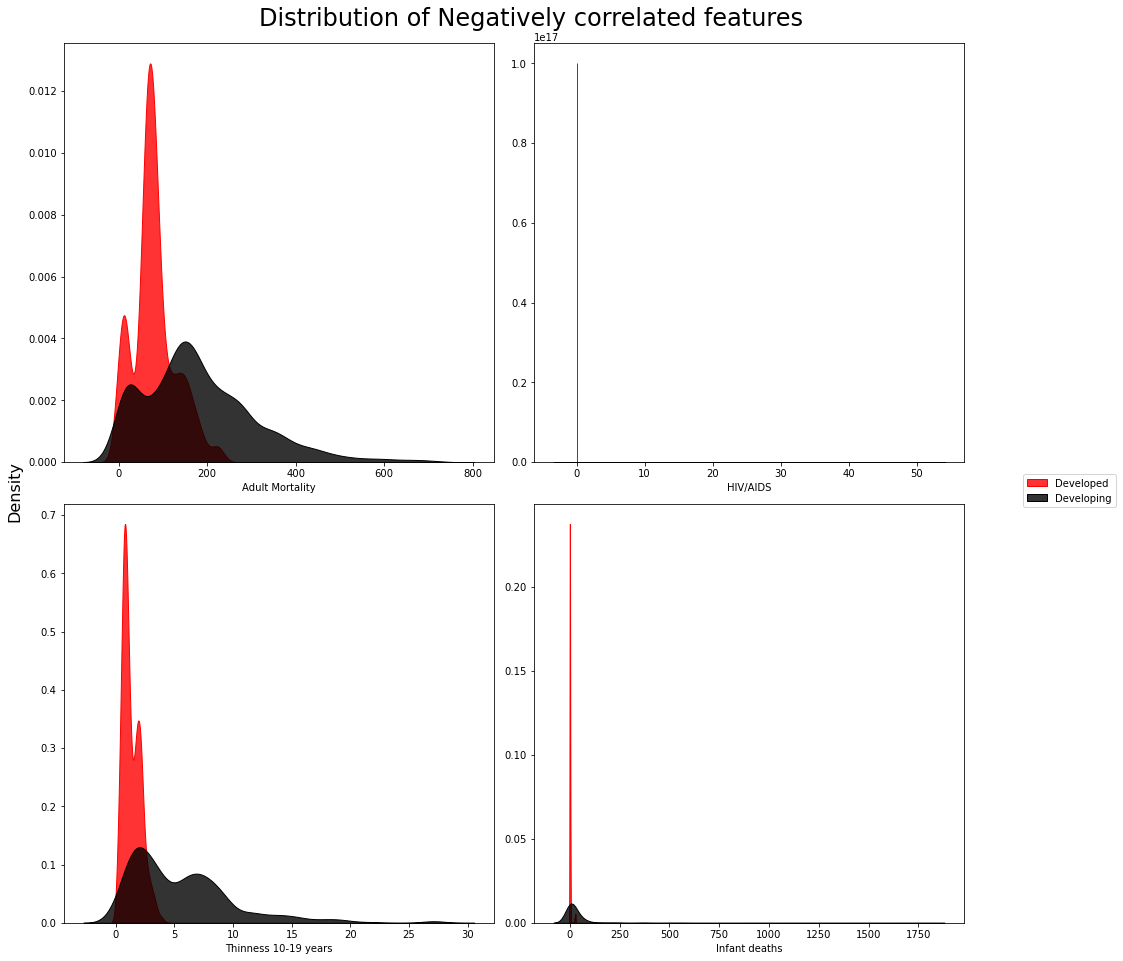

In [78]:
title = 'Distribution of Negatively correlated features'
plot_distribution(data, neg_correlated_features, title)

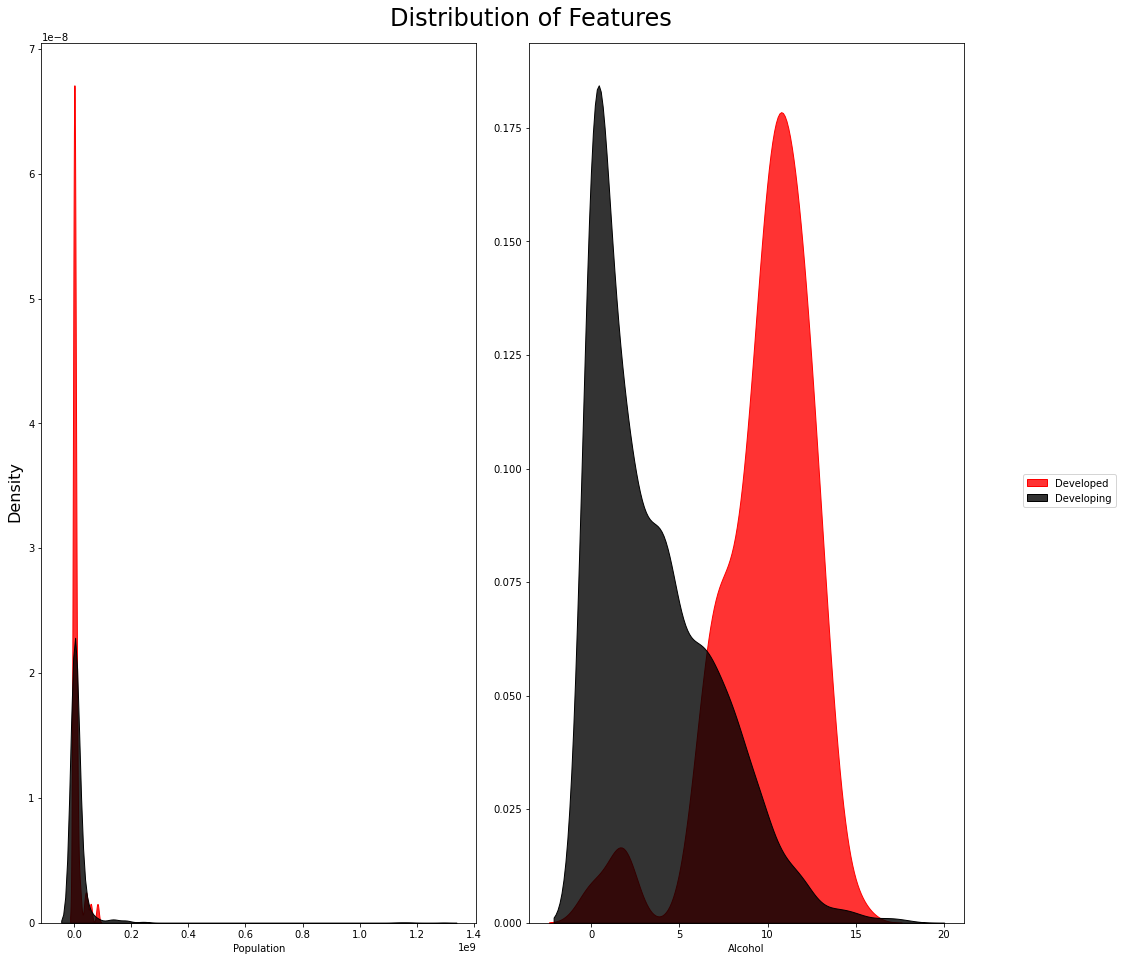

In [79]:
plot_distribution(df_temp, features)

- By looking at the graphs it seems population does not have much impact on life expectancy
- Alcohol consumption is also not related to life expectancy as we can see in the graph the countries having higher alcohol consumption also having high life expectancy. 

In [80]:
#Function to plot box plot
def plot_boxplot(df, columns, title = 'Box plot of features'):
      
    df = df.copy()
    
    rows = math.ceil(len(columns)/2)
    
    fig, ax = plt.subplots(rows, 2, figsize = (14,14))
    
    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)
        
        sns.boxplot(x = df[column], 
                    data = data, 
                    ax = ax, 
                    color = 'red')
    
        ax.set_xlabel(column)
        ax.set_ylabel('')
    
    fig.suptitle(title, 
                 fontsize=24,
                 x = 0.56);
    
    fig.text(0.04, 0.5, 
             'Density', 
             va='center', 
             rotation='vertical', 
             fontsize=16)
    
    fig.tight_layout(rect=[0.05, 0.03, 1, 1]) 

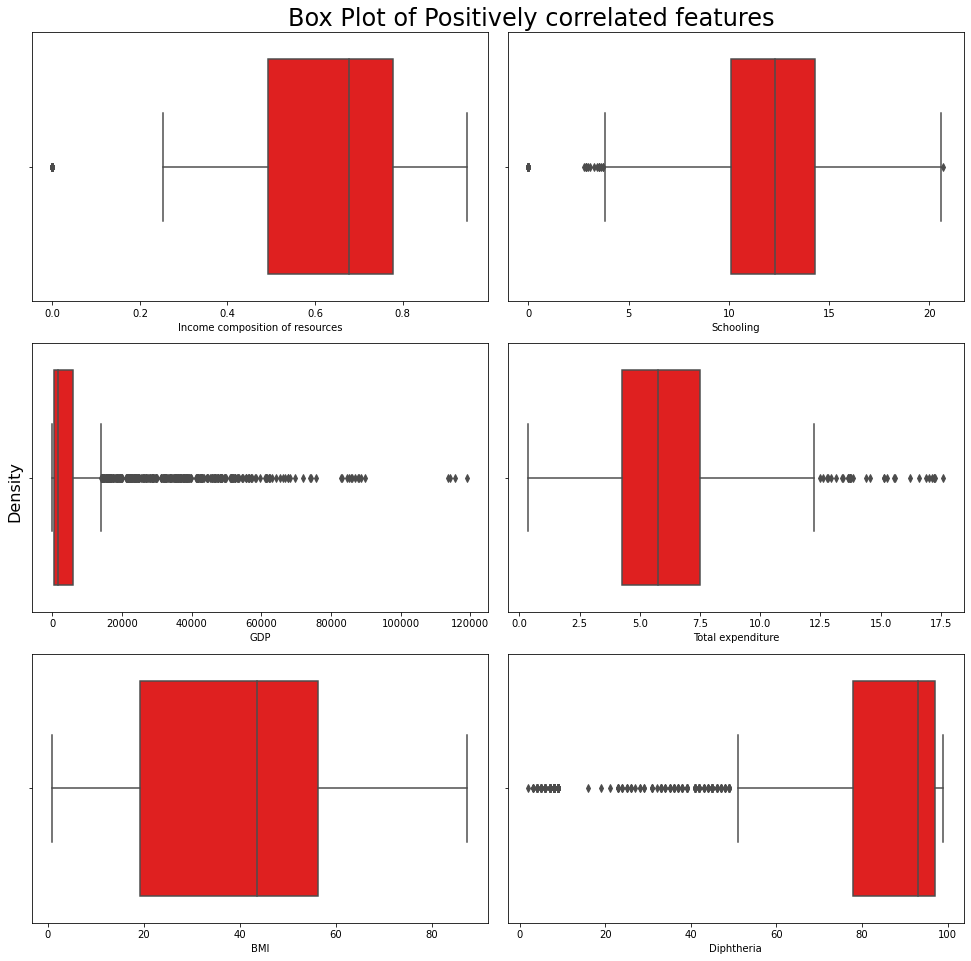

In [81]:
title = 'Box Plot of Positively correlated features'
plot_boxplot(data, pos_correlated_features, title)

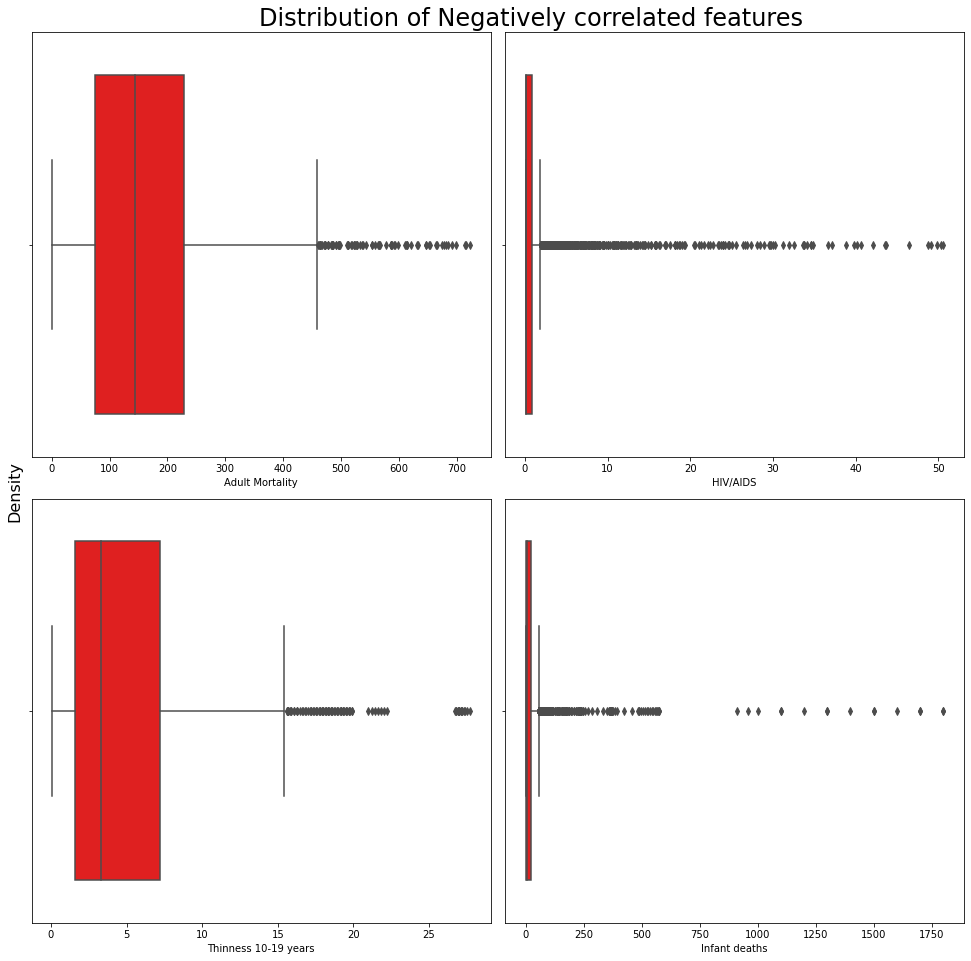

In [82]:
title = 'Distribution of Negatively correlated features'
plot_boxplot(data, neg_correlated_features, title)

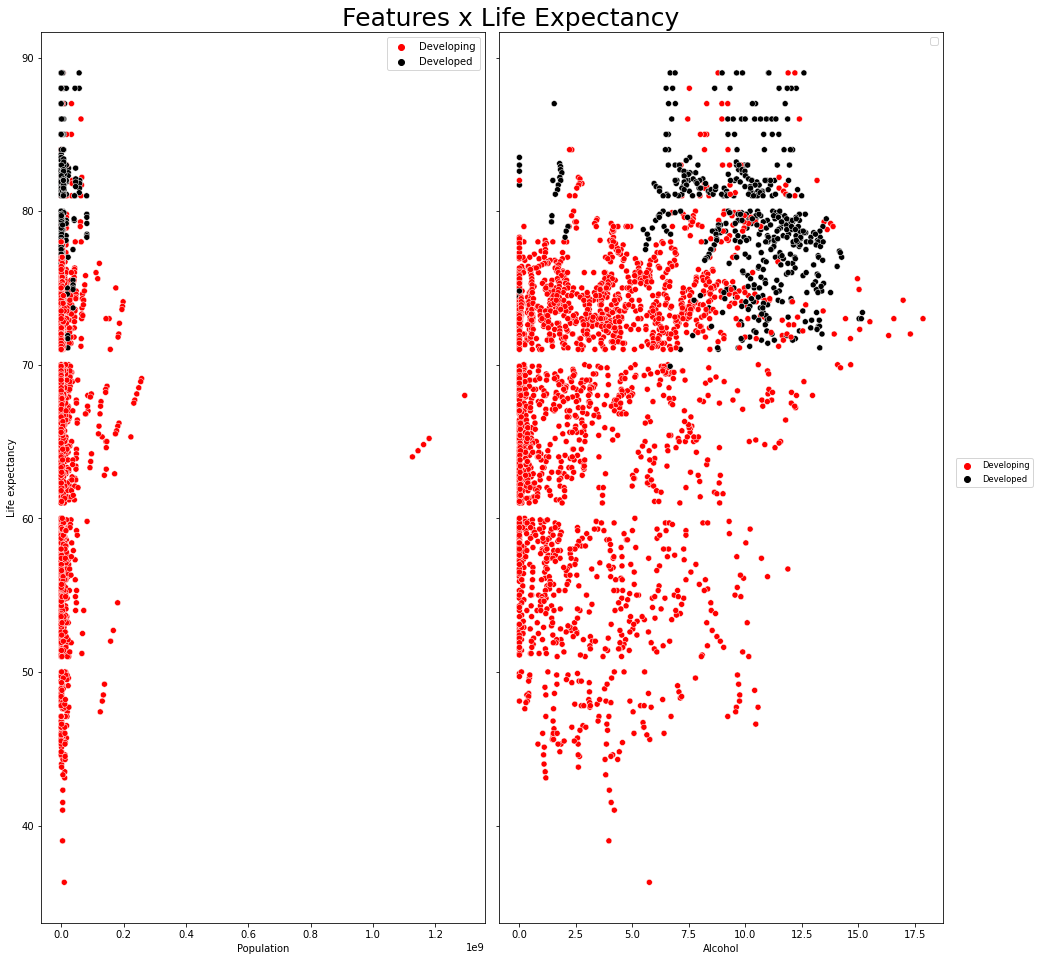

In [83]:
#Check other correlations
df_temp = data.loc[data['Population'] <= 1*1e7, :] 
features = ['Population', 'Alcohol']
plot_scatterplot(df_temp, features)

#### Take away from EDA
- Maximum columns in dataset are having outliers, out of those some are significant too like population which is highest for China followed by India and USA, which would seem as outlier compared to rest of data

# Data preprocessing

### Data cleaning
- Finding and treating missing values

In [84]:
pd.DataFrame(data.isnull().mean().sort_values(ascending=False)*100, columns=['% Missing'])

,% Missing
Population,22.191967
Hepatitis B,18.822328
GDP,15.248468
Total expenditure,7.692308
Alcohol,6.603131
Income composition of resources,5.684139
Schooling,5.547992
Thinness 5-9 years,1.157250
Thinness 10-19 years,1.157250
BMI,1.157250


In [85]:
data.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [90]:
#To detect and treating outliers
class Outlier_detection(BaseEstimator,TransformerMixin):
    def __init__(self, baseline=1.5):
        self.baseline = baseline
        
    def fit(self, X, y=None):
        X = check_array(X, force_all_finite=False) #If non-array, transform into an array
        q1 = np.nanquantile(X, 0.25, axis=0) #First quartile
        q3 = np.nanquantile(X, 0.75, axis=0) #Third quartile
        IQR = q3 - q1
        self.lower_bound = q1 - (self.baseline * IQR)
        self.upper_bound = q3 + (self.baseline * IQR)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self)
        X = check_array(X, force_all_finite=False)
        assert self.n_features_in_ == X.shape[1]
        X_transformed = X.copy()
        X_transformed = np.where(((X_transformed < self.lower_bound) | (X_transformed > self.upper_bound)),
                                 np.nan, 
                                 X_transformed)
        
        
        return X_transformed #Returns an array

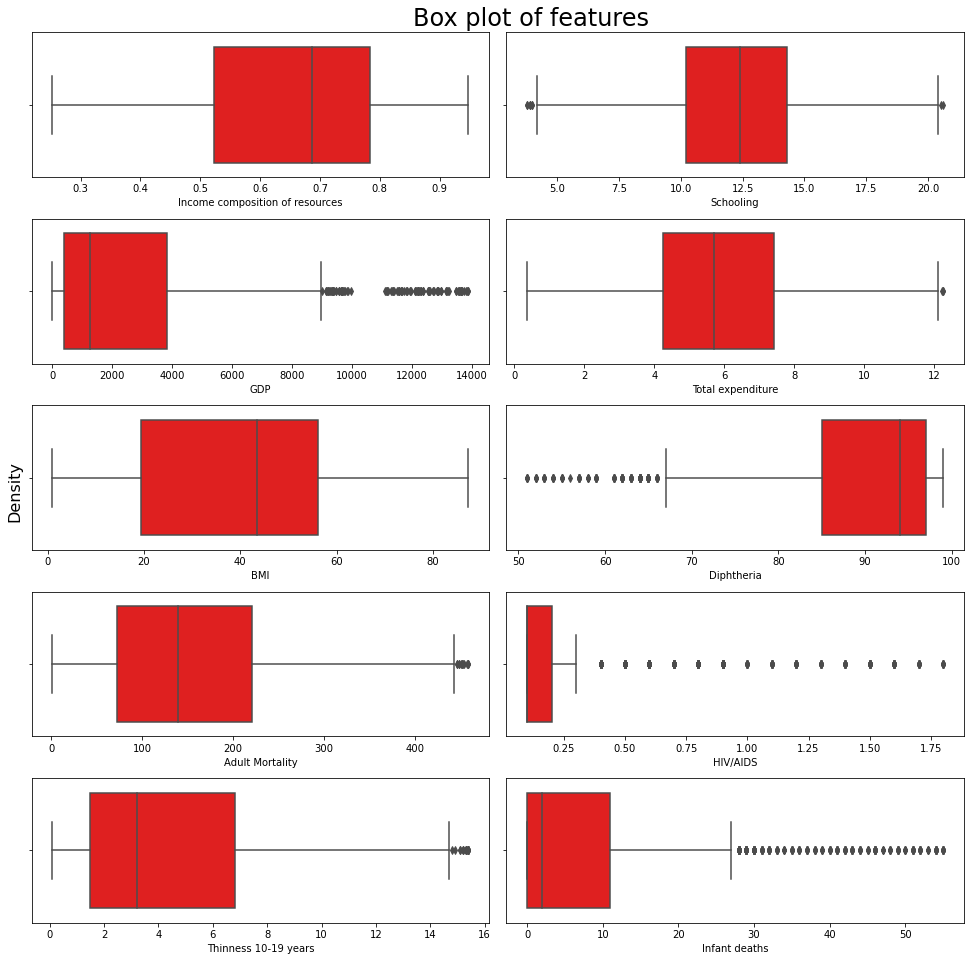

In [91]:
#Select the features
features = pos_correlated_features + neg_correlated_features

#Create a copy of the Dataframe with the selected features
df_temp = data[features].copy()

#Create, fit and transform the class Outlier_detection()
remove_outliers = Outlier_detection()
df_temp_without_outliers = remove_outliers.fit_transform(df_temp)

#Transform array back to a DataFrame
df_temp_transformed = pd.DataFrame(data = df_temp_without_outliers, columns = features)

#Plot boxplot
plot_boxplot(df_temp_transformed, features)

- After transformation some of the outliers are managed but many outliers are still visible in our dataset
- Still many outliers are there especially in HIV/AIDS, infant deaths, diptheria, GDP

In [92]:
df_temp_transformed.isnull().sum()

Income composition of resources    297
Schooling                          207
GDP                                813
Total expenditure                  258
BMI                                 34
Diphtheria                         317
Adult Mortality                     92
HIV/AIDS                           542
Thinness 10-19 years               123
Infant deaths                      315
dtype: int64

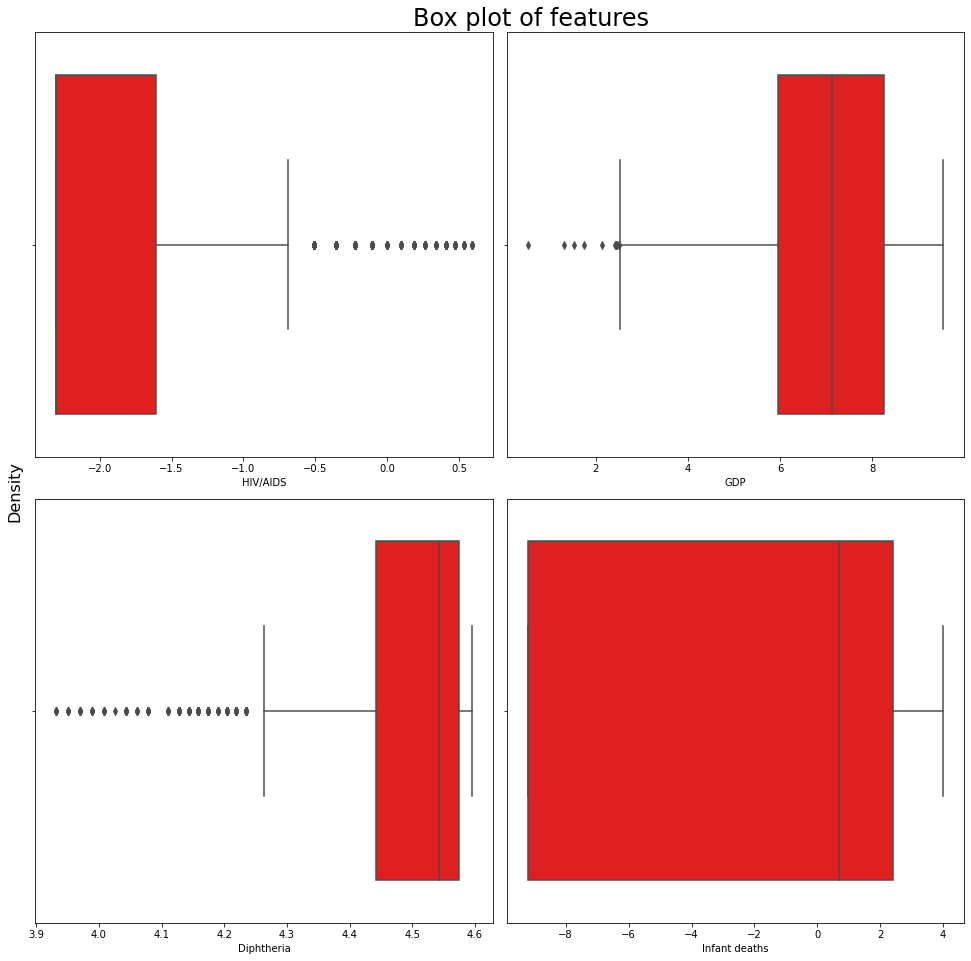

In [93]:
#Apply log transformation
columns_to_log = ['HIV/AIDS', 'GDP', 'Diphtheria','Infant deaths']

X_train_log = df_temp_transformed[columns_to_log].copy()

X_train_log= X_train_log.apply(lambda x: np.log(x + 10e-5))

plot_boxplot(X_train_log, columns_to_log)

## Feature selection and scaling
- Feature selection:
         1. We have 22 different features in our dataset, some of which are not relevant as far as model building is concerned, during EDA we found that Country, Population, Year have nothing to do with model because this variables are not generalised but specific so better to avoid them while doing model building
         

In [94]:
#Function to split the data and perform the preprocessing.
def preprocessing(data):
    #Create a copy of dataframe.
    data = data.copy()
    
    #Drop rows where target is null
    data.dropna(subset=['Life expectancy'], inplace=True)
    
    #Create new feature 'Thinness 5-19 years'
    data['Thinness 5-19 years'] = data['Thinness 5-9 years'] + data['Thinness 10-19 years']
    data.drop(['Thinness 5-9 years', 'Thinness 10-19 years'], axis = 1, inplace = True)
    
    #Split the target variable and the features.
    y = data['Life expectancy']
    X = data.drop('Life expectancy', axis=1)
    
    #Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=18) 
    
    #Fill missing with historical mean for each country
    ##The historical_mean is calculated only using X_train data. 
    ###It must be considered that there is no access to the test set.
    for column in X_train.columns[X_train.isna().any()]:
        historical_mean_train = X_train.groupby('Country')[column].transform('mean')
        X_train[column].fillna(historical_mean_train, inplace=True)
        X_test[column].fillna(historical_mean_train, inplace=True)
    
    X_train.drop(['Country', 'Year', 'Population', 'Status'], axis = 1, inplace = True)
    X_test.drop(['Country', 'Year', 'Population', 'Status'], axis = 1, inplace = True)
    
    return X_train, X_test, y_train, y_test

In [95]:
X_train, X_test, y_train, y_test = preprocessing(data)

## Pipeline

In [97]:
def log_transform(X):    
    return np.log(X + 10e-5)

In [98]:
def pipeline(regressor):
    # define list of features that are known to be skewed in the dataset
    skewed_features = ['HIV/AIDS', 'GDP', 'Diphtheria', 'Infant deaths']
    
    # define list of numerical features that are not skewed
    numerical_features = [feature for feature in X_train.columns 
                        if feature not in skewed_features]
    
    # define pipeline for numerical features
    numerical_transformer = Pipeline(
        steps=[
            ('outliers', Outlier_detection()), # remove outliers from data
            ('impute', KNNImputer()), # impute missing values using K-Nearest Neighbors
            ('scaling', StandardScaler()), # scale features to have mean 0 and unit variance
        ]
    )
    
    # define pipeline for skewed features
    skewed_transformer = Pipeline(
        steps=[
            ('outliers', Outlier_detection()), # remove outliers from data
            ('log', FunctionTransformer(log_transform)), # apply natural logarithm transformation to skewed features
            ('impute', KNNImputer()), # impute missing values using K-Nearest Neighbors
            ('scaling', StandardScaler()), # scale features to have mean 0 and unit variance
        ]
    )
    
    # define ColumnTransformer to apply each pipeline to appropriate features
    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical_transformer', numerical_transformer, numerical_features), # apply numerical pipeline to numerical features
            ('skewed_transformer', skewed_transformer, skewed_features) # apply skewed pipeline to skewed features
        ],
        remainder='passthrough' # pass through any remaining features
    )

    # define final pipeline, consisting of preprocessor and regressor
    model = Pipeline(
        steps=[
            ('preprocessor', preprocessor), # apply preprocessor to data
            ('regressor', regressor) # apply regressor to preprocessed data
        ]
    )

    return model

# Model building

In [103]:
!pip install xgboost

In [108]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

In [109]:
#Dict with the regressors
models = {
    "Linear Regression (Ridge)": pipeline(Ridge()),
    "Decision Tree": pipeline(DecisionTreeRegressor()),
    "Support Vector Regression": pipeline(SVR()),
    "Random Forest": pipeline(RandomForestRegressor()),
    "Gradient Boosting": pipeline(XGBRegressor())
}

In [110]:
def evaluate_model(model, X_train, y_train):

    cv = cross_validate(model, 
                        X_train, y_train,
                        cv = 5,
                        scoring = ('neg_root_mean_squared_error','r2'))

    return np.mean(-cv['test_neg_root_mean_squared_error']), np.mean(cv['test_r2'])

In [111]:
models_name = []
models_rmse = []
models_r2 = []

for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train, y_train)
    models_name.append(name)
    models_rmse.append(rmse)
    models_r2.append(r2)

df_models = pd.DataFrame(data = 
                         {'Mean RMSE in CV' : models_rmse,
                          'Mean R2 in CV' : models_r2
                         }, 
                         index = models_name)


In [112]:
display(df_models)

,Mean RMSE in CV,Mean R2 in CV
Linear Regression (Ridge),3.947167,0.826491
Decision Tree,3.609735,0.854304
Support Vector Regression,3.998957,0.821656
Random Forest,2.456816,0.932019
Gradient Boosting,2.544584,0.927690


In [113]:
def plot_feature_importance(df):   
    
    df = df.sort_values(by = '% Importance',
                                ascending = False).copy()
    
    df_temp = df['% Importance'].sort_values()
    
    display(df)
    
    fig, ax = plt.subplots(figsize=(16,16))

    bar = ax.barh(df_temp.index,
                 df_temp,
                 align = ('center'),
                 color ='red',
                 height = 0.9)

    ax.bar_label(bar, fmt = '%.f%%', padding=2)
    ax.set_xlabel('Importance (%)')
    ax.set_title('Feature Importance \n', fontsize=18);

,% Importance
Total expenditure,78.299866
Adult Mortality,9.539297
Infant deaths,2.498737
HIV/AIDS,1.988855
Income composition of resources,1.101825
Diphtheria,0.980328
Alcohol,0.702036
Polio,0.683593
Thinness 5-19 years,0.681998
Percentage expenditure,0.618727


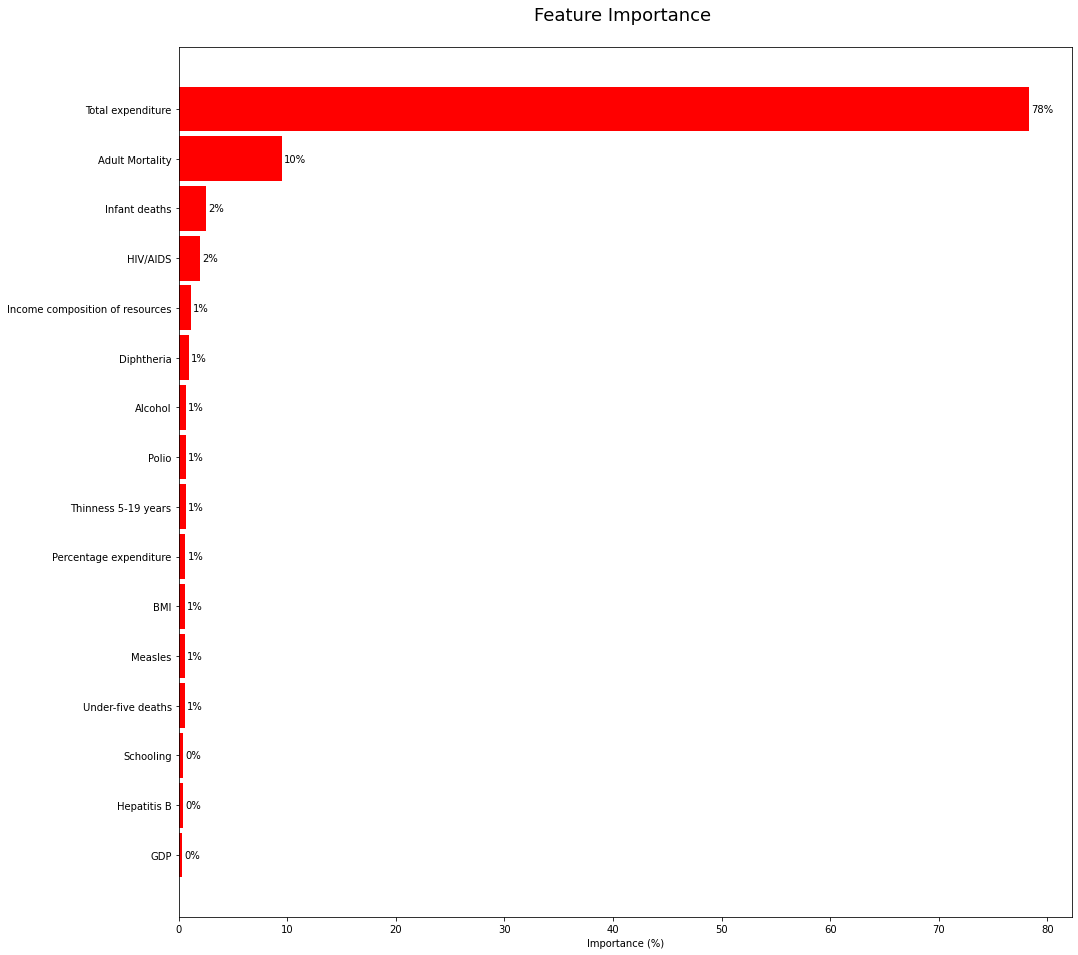

In [114]:
models['Random Forest'].fit(X_train, y_train)

df_feature_importance = pd.DataFrame(data = 100* models['Random Forest']['regressor'].feature_importances_, 
                                  index = X_train.columns,
                                  columns = ['% Importance'])

plot_feature_importance(df_feature_importance)